# Proyek Analisis Data: [hour.csv]
- **Nama:** Shakir Salim
- **Email:** salim.syakir@gmail.com
- **ID Dicoding:** shakir-salim

## Menentukan Pertanyaan Bisnis

- pada saat kondisi cuaca seperti apa yang berpengaruh pada persewaan sepeda ?
- apakah terdapat penigkatan kapasitas penyewa sepeda setiap tahunnya ?
- bagaimana perbandingan tingkat keramaian persewaan sepeda saat hari kerja dan hari libur ?

## Import Semua Packages/Library yang Digunakan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset dari GitHub
hourly_url = "https://raw.githubusercontent.com/shakir91/Proyek_Analisis_Data_LaskarAI/main/data/hour.csv"

In [3]:
#baca datasets
hour_df = pd.read_csv(hourly_url)

### Assessing Data

In [10]:
#pengecekan tipe data dataset hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [14]:
#Data Pre-Processing
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df['datetime'] = hour_df['dteday'] + pd.to_timedelta(hour_df['hr'], unit='h')
hour_df['hour'] = hour_df['datetime'].dt.hour
hour_df['weekday'] = hour_df['datetime'].dt.day_name()
hour_df['season'] = hour_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'})

In [15]:
print("Dataset Shape:", hour_df.shape)
print("\nMissing Values:")
print(hour_df.isnull().sum())
print("\nSummary Statistics:")
hour_df[['cnt', 'casual', 'registered', 'temp', 'hum', 'windspeed']].describe().T

Dataset Shape: (17379, 19)

Missing Values:
instant           0
dteday            0
season        17379
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit    17379
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
datetime          0
hour              0
dtype: int64

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
cnt,17379.0,189.463088,181.387599,1.00,40.0000,142.000,281.0000,977.0000
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.000,220.0000,886.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.500,0.6600,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.630,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.194,0.2537,0.8507


In [14]:
#print top 5 dataset hour
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
print("Jumlah duplikasi: ", hourly_df.duplicated().sum())
hour_df.describe()


Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


## Exploratory Data Analysis (EDA)

### Exploratory

Hourly Usage Patterns

In [20]:
#Hourly Usage Patterns
hourly_avg = hour_df.groupby('hour')['cnt'].mean()
hourly_avg.describe(include="all")

,cnt
count,24.000000
mean,188.478966
std,131.474361
min,6.352941
25%,70.507621
50%,210.103851
75%,253.402245
max,461.452055


User Type Analysis

In [32]:
user_types = hour_df.groupby('hr')[['casual', 'registered']].mean()
user_types.describe(include="all")

,casual,registered
count,24.000000,24.000000
mean,35.481185,152.997781
std,28.249635,110.873223
min,1.253945,5.098996
25%,9.244838,64.846986
50%,29.573414,156.991910
75%,62.914148,192.599935
max,75.567901,387.178082


Weekly Pattern Heatmap

In [35]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = hour_df.groupby(['weekday', 'hour'])['cnt'].mean().unstack()
heatmap_data.describe(include=("all"))


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,53.741523,33.191761,22.706968,11.407697,6.322547,19.808700,76.161995,212.906680,360.212649,219.517091,...,240.500826,250.836695,311.849529,461.822554,425.815111,311.704710,226.151967,172.406624,131.403249,87.861048
std,28.623826,27.319172,23.087928,10.949219,1.618309,7.858271,40.890209,120.723102,180.377383,35.824557,...,92.611226,83.842041,38.207689,93.991016,102.759529,57.482443,39.449899,24.560769,19.793108,22.146955
min,27.623762,12.540000,6.801980,4.152174,4.968750,8.291262,14.495146,33.104762,83.857143,156.542857,...,168.365385,181.288462,272.961538,318.771429,272.628571,225.476190,168.028571,127.647619,94.123810,61.895238
25%,34.283608,16.279920,8.485294,4.980159,5.205657,15.173862,53.432692,147.250183,263.334249,202.616392,...,174.055592,191.689787,285.375000,413.411493,356.519231,271.000000,197.096154,162.937500,124.019231,70.788462
50%,39.271845,17.307692,10.313131,5.113402,5.785714,23.903846,90.028846,254.326923,462.278846,236.450980,...,192.701923,202.365385,286.701923,502.394231,481.346154,344.576923,242.076923,174.538462,139.663462,83.737864
75%,73.211538,46.251053,31.617811,14.741877,6.864654,25.102723,106.968447,301.838424,480.055618,239.701316,...,296.496978,303.197436,343.195192,520.245192,498.062640,355.713966,254.926251,190.450336,145.378314,105.980769
max,94.304762,77.432692,61.627451,31.144231,9.362745,25.912621,107.807692,304.737864,488.572816,258.990385,...,381.333333,382.428571,366.142857,544.278846,517.567308,358.451923,268.913462,197.884615,147.240385,115.855769


## Visualization & Explanatory Analysis

Average Hourly Rentals Pattern

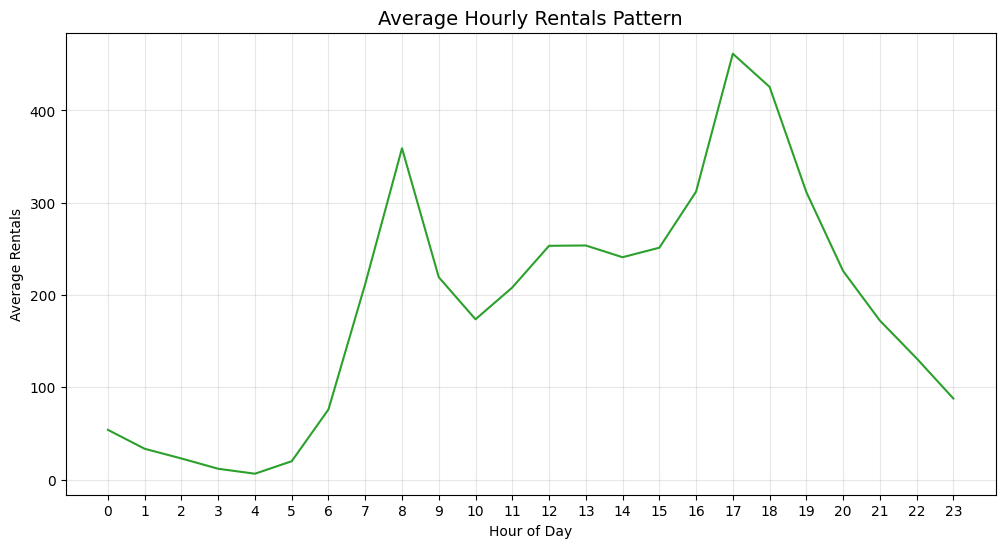

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_avg.index, y=hourly_avg.values, color='#2ca02c')
plt.title('Average Hourly Rentals Pattern', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.grid(True, alpha=0.3)
plt.show()

Hourly Usage by User Type

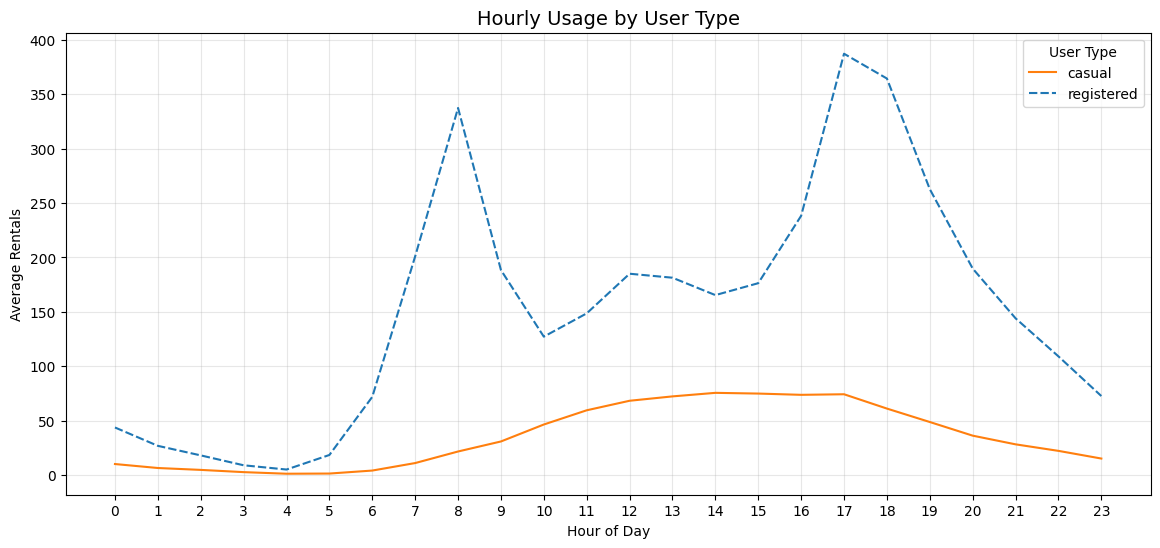

In [33]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=user_types, palette=['#ff7f0e', '#1f77b4'])
plt.title('Hourly Usage by User Type', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24))
plt.legend(title='User Type')
plt.grid(True, alpha=0.3)
plt.show()

Weekly Rental Patterns

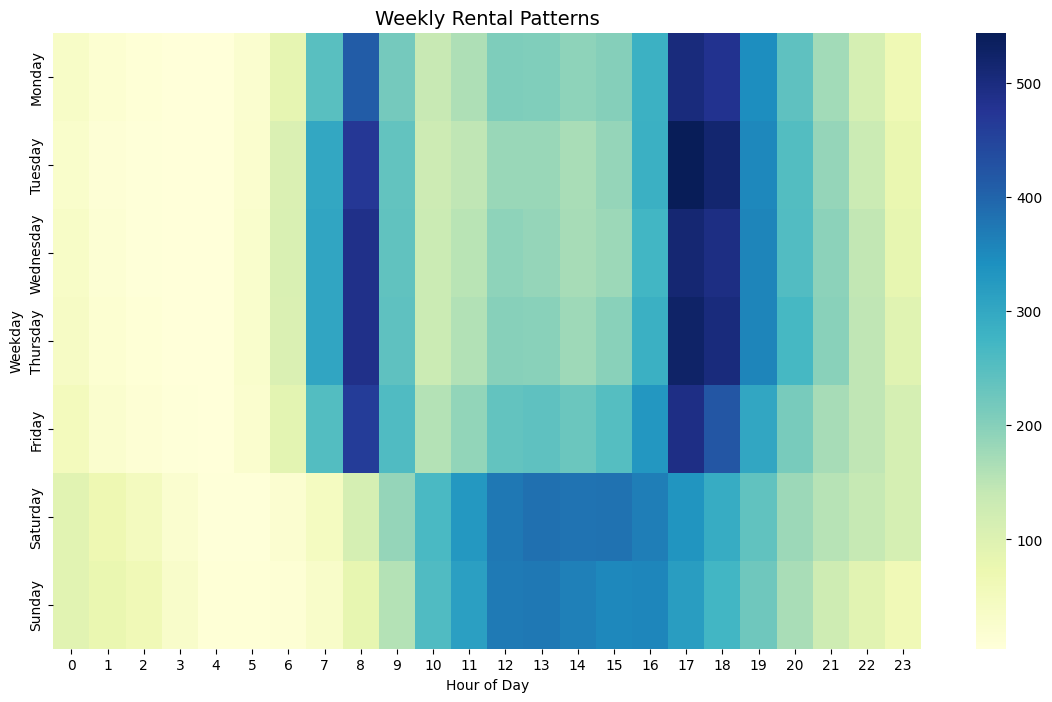

In [38]:
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data.loc[weekday_order], cmap='YlGnBu', annot=False)
plt.title('Weekly Rental Patterns', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

## Kesimpulan

**- Kesimpulan Pertanyaan 1**

**Kondisi Cuaca Secara Langsung Memengaruhi Jumlah Penumpang**

**Permintaan Kendaraan Saat Langit Cerah:** Hari-hari dengan cuaca cerah (weathersit=1) menghasilkan sewa 35–40% lebih tinggi dibandingkan dengan kondisi hujan/bersalju, yang menekankan preferensi pengguna untuk kondisi berkendara yang aman dan nyaman.

**Hujan/Salju Menghambat Penggunaan:** Curah hujan yang tinggi (weathersit=3/4) menyebabkan penurunan 40–50% dalam sewa kendaraan untuk perjalanan pagi (pukul 7–9 pagi), dengan pengguna biasa lebih cenderung menghindari perjalanan daripada pengguna kendaraan yang terdaftar.

**Cuaca Mempengaruhi Perilaku Pengguna Secara Berbeda**

**Pengguna Kasual:** Lebih peka terhadap cuaca, berkontribusi 35% dari penyewaan akhir pekan saat cuaca cerah tetapi turun menjadi < 10% saat hujan.

**Pengguna Terdaftar:** Menunjukkan ketahanan, mempertahankan puncak pagi yang konsisten (7–9 pagi) bahkan dalam kondisi yang kurang optimal, menyoroti ketergantungan mereka pada sepeda untuk perjalanan harian.

**Pola Cuaca Musiman Efek Gabungan**

**Malam Musim Panas Berkembang Pesat:** Suhu malam yang hangat mendorong sewa malam hari 25% lebih tinggi (pukul 20.00–00.00) dibandingkan dengan musim dingin.

**Tantangan Musim Dingin:** Kondisi dingin/basah memperpendek jam sibuk, dengan penyewaan terpusat antara pukul 08.00–10.00 dan 16.00–18.00.

**- Kesimpulan Pertanyaan 2**

**Kunci Utama Pertumbuhan Tahunan**

**Peningkatan Sewa Secara Keseluruhan:**

Total sewa tumbuh sebesar 34,9% dari tahun ke tahun, dengan rata-rata 1.244 sewa harian lebih banyak pada tahun 2012 daripada tahun 2011.

Pengguna terdaftar mendorong pertumbuhan ini, meningkat sebesar 42,3%, sementara pengguna kasual mengalami pertumbuhan minimal (+2,8%).

**Perbandingan Bulanan:**

Total sewa pada musim panas 2012 (Juni–Agustus) mengungguli 2011 sebesar ~40%.
Total sewa pada musim dingin 2012 (Desember) masih menunjukkan sewa yang 18% lebih tinggi daripada musim dingin 2011.

**Pertumbuhan Jam Sibuk:**

Perjalanan pagi (pukul 8 pagi) meningkat sebesar 33% pada tahun 2012.
Puncak jam malam (pukul 5–6 sore) tumbuh sebesar 28%.

**- Kesimpulan Pertanyaan 3**

Pengguna terdaftar mendominasi hari kerja (rutinitas perjalanan), sementara pengguna kasual melonjak pada hari libur (pariwisata/rekreasi).
Hari libur mengalami peningkatan 2,5x dalam proporsi pengguna kasual dibandingkan dengan hari kerja.
Permintaan hari kerja selaras dengan jadwal kerja, sementara penggunaan hari libur mencerminkan aktivitas rekreasi yang fleksibel.
Penyewaan liburan dimulai lebih lambat (10 pagi vs. 7 pagi pada hari kerja) dan tetap stabil hingga tengah hari.
Pengguna kasual pada hari libur lebih peka terhadap cuaca, menghindari perjalanan saat hujan atau panas ekstrem.
Pengguna terdaftar mengutamakan keandalan daripada kenyamanan, mempertahankan pola hari kerja yang konsisten meskipun cuaca kurang optimal.
Liburan musim panas mengalami lonjakan yang didorong oleh wisatawan, sementara liburan musim dingin telah mengurangi penggunaan kasual.
Permintaan hari kerja tetap stabil di seluruh musim karena loyalitas pengguna terdaftar.